In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
tf.set_random_seed(777)

In [3]:
file = 'MSFT.csv' 
encoding = 'euc-kr' 
name = ['date','open','high','low','close','adj close','volume']
df = pd.read_csv(file, names=name, encoding=encoding) 
df.info() 

del df['date'] 

stk = df.values[1:].astype(np.float) 
print("stk의 shape: ", stk.shape)
print("stk[0]: ", stk[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5034 non-null   object
 1   open       5034 non-null   object
 2   high       5034 non-null   object
 3   low        5034 non-null   object
 4   close      5034 non-null   object
 5   adj close  5034 non-null   object
 6   volume     5034 non-null   object
dtypes: object(7)
memory usage: 275.4+ KB
stk의 shape:  (5033, 6)
stk[0]:  [3.3007813e+01 3.4187500e+01 3.3000000e+01 3.3437500e+01 2.1394083e+01
 6.4400000e+07]


In [4]:
def mm_scaling(x):
    x = np.asarray(x)
    return (x - x.min()) / (x.max() - x.min() + 1e-7) 

price = stk[:,:-1]
n_price = mm_scaling(price) 
print("price[0]: ", price[0])
print("n_price[0]: ", n_price[0])
print("price의 shape: ", price.shape)
print("-"*100)

vol = stk[:,-1:]
n_vol= mm_scaling(vol) 
print("vol[0]: ", vol[0])
print("n_vol[0]: ", n_vol[0])
print("vol의 shape: ", vol.shape)
print("-"*100)


a = np.concatenate((n_price, n_vol), axis=1) 
print("a[0]_(날짜 제외 첫날): ", a[0])  
print("a[-1]_(날짜 제외 마지막날): ", a[-1])  
print("a의 shape: ", a.shape)
print("-"*100) 

b = a[:, [-3]] 
print("b[0]_(첫날 종가): ",b[0])    
print("b[-1]_(마지막날 종가): ",b[-1])   


price[0]:  [33.007813 34.1875   33.       33.4375   21.394083]
n_price[0]:  [0.1192017  0.1257909  0.11915806 0.12160174 0.05433257]
price의 shape:  (5033, 5)
----------------------------------------------------------------------------------------------------
vol[0]:  [64400000.]
n_vol[0]:  [0.09762132]
vol의 shape:  (5033, 1)
----------------------------------------------------------------------------------------------------
a[0]_(날짜 제외 첫날):  [0.1192017  0.1257909  0.11915806 0.12160174 0.05433257 0.09762132]
a[-1]_(날짜 제외 마지막날):  [0.95486871 0.9834109  0.95146152 0.98045056 0.98045056 0.05563146]
a의 shape:  (5033, 6)
----------------------------------------------------------------------------------------------------
b[0]_(첫날 종가):  [0.12160174]
b[-1]_(마지막날 종가):  [0.98045056]


In [5]:
dataA = [] 
dataB = [] 
seq_len = 130 

for i in range(0, len(b) - seq_len):
    aa = a[i : i+seq_len]
    bb = b[i + seq_len] 
    if i is 0:
        print(aa, ">>", bb) 
    dataA.append(aa) 
    dataB.append(bb) 

[[0.1192017  0.1257909  0.11915806 0.12160174 0.05433257 0.09762132]
 [0.12526726 0.12998007 0.12421996 0.12928187 0.05924656 0.15693836]
 [0.12823458 0.13242375 0.12229993 0.13172555 0.06081006 0.11802923]
 [0.13469288 0.13626382 0.1254418  0.12701274 0.05779467 0.14965048]
 [0.12928187 0.12945642 0.12561635 0.12701274 0.05779467 0.04846352]
 [0.12753639 0.12753639 0.12020535 0.12160174 0.05433257 0.07168111]
 [0.12125264 0.12474361 0.11950715 0.12439451 0.05611948 0.06316299]
 [0.12980552 0.13312194 0.12893278 0.13172555 0.06081006 0.12433772]
 [0.1325983  0.13783475 0.13207465 0.13696201 0.06416051 0.09966475]
 [0.1376602  0.13905659 0.13451833 0.13748566 0.06449548 0.10500721]
 [0.13748566 0.14097663 0.13591472 0.14062753 0.06650573 0.06713059]
 [0.14115118 0.14499125 0.14080208 0.1441185  0.06873932 0.09398029]
 [0.14987861 0.16436614 0.14970406 0.16017697 0.07901389 0.26210937]
 [0.16209701 0.16384249 0.1563369  0.15790784 0.07756216 0.13688478]
 [0.15808239 0.15843149 0.14987861

In [6]:
trainsize = int(len(dataB) * 0.8)

testsize = len(dataB) - trainsize

trainA = np.array(dataA[0:trainsize])
trainB = np.array(dataB[0:trainsize])
 
testA = np.array(dataA[trainsize:len(dataA)])
testB = np.array(dataB[trainsize:len(dataB)])

In [7]:
A = tf.placeholder(tf.float32, [None, seq_len, 6])
print("입력 : ", A)
B= tf.placeholder(tf.float32, [None, 1])
print("출력 : ", B)

targets = tf.placeholder(tf.float32, [None, 1])
print("targets : ", targets)
 
predict = tf.placeholder(tf.float32, [None, 1])
print("predictions : ", predict)

입력 :  Tensor("Placeholder:0", shape=(?, 130, 6), dtype=float32)
출력 :  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets :  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions :  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [8]:
kp_prb = 1.0   
f_bias = 1.0
def lstmcell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=20, 
                                        forget_bias=f_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if kp_prb < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, out_kp_prb=kp_prb)
    return cell

num_stklayers = 1 
multi_cell = tf.contrib.rnn.MultiRNNCell([lstmcell() for _ in range(1)], state_is_tuple=True) if num_stklayers > 1 else lstmcell()
 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [9]:
hypo, _states = tf.nn.dynamic_rnn(multi_cell, A, dtype=tf.float32 )
print("hypothesis: ", hypo)


hypo = tf.contrib.layers.fully_connected(hypo[:, -1],1, activation_fn=tf.identity)


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 130, 20), dtype=float32)
Instructions for updating:
Please use `layer.__call__` method instead.


In [10]:
loss = tf.reduce_sum(tf.square(hypo - B))

learnrate = 0.001 
opt = tf.train.AdamOptimizer(learnrate)
 
train = opt.minimize(loss)

rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predict)))

In [11]:
trainerrors = [] 
testerrors = []  
testpredict = ''        

sess = tf.Session()
sess.run(tf.global_variables_initializer())
ep_num = 1000   

starttime = datetime.datetime.now() 
print('학습을 시작합니다.')
for epoch in range(ep_num):
    _, _loss = sess.run([train, loss], feed_dict={A: trainA, B: trainB})
    if ((epoch+1) % 100 == 0) or (epoch == ep_num-1): 
        trainpredict = sess.run(hypo, feed_dict={A: trainA})
        trainerror = sess.run(rmse, feed_dict={targets: trainB, predict: trainpredict})
        trainerrors.append(trainerror)
 
        testpredict = sess.run(hypo, feed_dict={A: testA})
        testerror = sess.run(rmse, feed_dict={targets: testB, predict: testpredict})
        testerrors.append(testerror)
 
        print("epoch: {}, train error(P): {}, test error(Q): {}, Q-P: {}".format(epoch+1, trainerror, testerror, testerror-trainerror))
        
endtime = datetime.datetime.now() 
time = endtime - starttime 
print('경과 시간:',time)
print('에폭당 경과시간:',time/ep_num)

학습을 시작합니다.
epoch: 100, train error(P): 0.008320359513163567, test error(Q): 0.12684577703475952, Q-P: 0.1185254156589508
epoch: 200, train error(P): 0.007145269308239222, test error(Q): 0.11003640294075012, Q-P: 0.10289113223552704
epoch: 300, train error(P): 0.005994584411382675, test error(Q): 0.08608215302228928, Q-P: 0.0800875723361969
epoch: 400, train error(P): 0.0051990109495818615, test error(Q): 0.04448613151907921, Q-P: 0.03928712010383606
epoch: 500, train error(P): 0.005008980631828308, test error(Q): 0.030018901452422142, Q-P: 0.025009920820593834
epoch: 600, train error(P): 0.00485687330365181, test error(Q): 0.022112881764769554, Q-P: 0.017256008461117744
epoch: 700, train error(P): 0.00473368214443326, test error(Q): 0.0183575376868248, Q-P: 0.013623856008052826
epoch: 800, train error(P): 0.004631130024790764, test error(Q): 0.01659322902560234, Q-P: 0.011962099000811577
epoch: 900, train error(P): 0.004542648792266846, test error(Q): 0.01578483358025551, Q-P: 0.011242

In [12]:
incol_num = 6
outcol_num = 1 
celhid = 20  


print('입력 데이터 컬럼의 수 : ', incol_num  )
print('결과 데이터 컬럼의수 :', outcol_num)
print('시퀀스 길이 : ', seq_len)
print('각 셀의 출력 크기 : ', celhid)
print('forget_bias : ', f_bias)
print('stacked LSTM의 레이어 수:', 1)
print('dropout 할때 keep 할 비율 :', kp_prb)
 
print('에폭 횟수 : ', ep_num)
print('learning rate : ', learnrate)
 
print('train_error(최종) : ', trainerrors[-1])
print('test_error(최종) : ', testerrors[-1])
print('test_error(최소) : ', np.min(testerrors))

입력 데이터 컬럼의 수 :  6
결과 데이터 컬럼의수 : 1
시퀀스 길이 :  130
각 셀의 출력 크기 :  20
forget_bias :  1.0
stacked LSTM의 레이어 수: 1
dropout 할때 keep 할 비율 : 1.0
에폭 횟수 :  1000
learning rate :  0.001
train_error(최종) :  0.0044638133
test_error(최종) :  0.015552809
test_error(최소) :  0.015552809


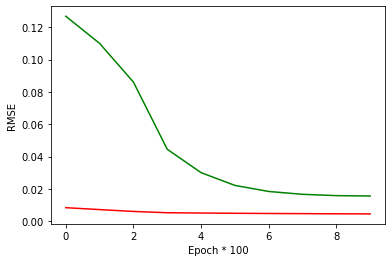

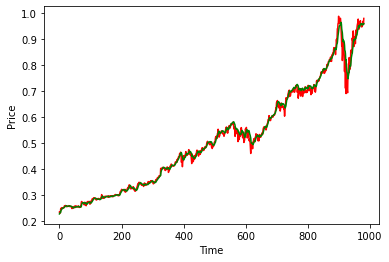

In [13]:
plt.figure(1)
plt.plot(trainerrors, 'red')
plt.plot(testerrors, 'green')
plt.xlabel("Epoch * 100")
plt.ylabel('RMSE')
 
plt.figure(2)
plt.plot(testB, 'red')
plt.plot(testpredict, 'green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [14]:
redata = np.array([a[len(a)-seq_len : ]])
print("최근 데이터의 shape :", redata.shape)
print("최근 데이터 : ", redata)

최근 데이터의 shape : (1, 130, 6)
최근 데이터 :  [[[0.78439764 0.78551474 0.77981745 0.78037604 0.77573089 0.00779899]
  [0.78277779 0.78288952 0.76328425 0.77015446 0.76556549 0.03425615]
  [0.75864823 0.76948414 0.7539563  0.7688139  0.76423225 0.02851207]
  [0.77344992 0.7736733  0.76819948 0.77183014 0.76723188 0.01738971]
  [0.77294724 0.77445536 0.76976343 0.77227692 0.76767626 0.01789415]
  [0.77819767 0.7831129  0.77417607 0.78244266 0.7777861  0.01538295]
  [0.77864453 0.78501206 0.77775082 0.7802643  0.77561976 0.01586939]
  [0.77987327 0.78322464 0.77691294 0.77897965 0.77434218 0.01550735]
  [0.78126966 0.7831129  0.77451119 0.78216337 0.77750834 0.01958615]
  [0.78188408 0.79188226 0.77836523 0.79076517 0.78606293 0.02944777]
  [0.78942461 0.7999813  0.78847507 0.7979705  0.79322871 0.02813408]
  [0.80121013 0.80562268 0.79959036 0.80355606 0.79878349 0.02864606]
  [0.8031092  0.8045615  0.79752365 0.79886421 0.79411747 0.03084164]
  [0.79668585 0.80327676 0.79601552 0.79707679 0.792

In [15]:
def re_mm_scaling(org_x, x):
    org_x = np.asarray(org_x)
    x = np.asarray(x)
    return (x * (org_x.max() - org_x.min() + 1e-7)) + org_x.min()

In [16]:
testpredict = sess.run(hypo, feed_dict={A: redata})
 
print("test predict : ", testpredict[0])
testpredict = re_mm_scaling(price,testpredict) 
print("다음날 주가(예축) : ", testpredict[0]) 
print("다음날 주가(실제) : ",[188.36])

test predict :  [0.9632552]
다음날 주가(예축) :  [184.12146]
다음날 주가(실제) :  [188.36]
